# Homework 7
### MODELADO DE DATOS CON REDES NEURONALES 
*Professor:* Michal Hemmerling \
*e-mail:* michal.hemmerling@udea.edu.co 

*Student:* Camilo José Torres Castaño \
*e-mail:* cjose.torres@udea.edu.co \
*C.c.* 1036401258

Teach a NN model to predict the prices of the houses from the `kc_house_data.csv'` dataset. 

* clean the data (NaN, repeated values, correlation...)
***I forgot to mention that the target (here `price`) should not be taken into account when making the correlation matrix***!!
* remove outliers (very large, very small values)
* split into train and test 
* use functions:
  * `get_model(input_shape)`
  * `get_regularized_model(input_shape,weight_decay,drop_ate)`
  * `compile_model()`
* use `metrics=['mape']` when compiling model
* `scores=model.evaluate(X_test,y_test)` should return mean absolute percentage error
* use ModelCheckpoint() callback to save the entire model into `.h5` file
* (you can possibly normalize the data before training the algorithm) check this out

    * "id": Numero de identificacion de la vivienda
    * "Date": Fecha en que se vendió la casa
    * "Price": el precio es el objetivo de predicción
    * "Bedrooms": Número de Dormitorios/Casa
    * "Bathrooms": Número de baños/Casa
    * "Sqft_Living": pies cuadrados de la casa
    * "Sqft_Lot": pies cuadrados del lote
    * "Floors": Total de pisos oniveles) en casa
    * "Waterfront": Casa que tiene vista a la costanera
    * "View": Ha sido visto
    * "Condition": Qué tan buena es la condición ogeneral)
    * "Grade": calificación de vivienda, según el sistema del condado de King
    * "Sqft_above": pies cuadrados de la casa aparte del sótano
    * "Sqft_Basement": pies cuadrados del sótano
    * "Yr_Built": año de construcción
    * "Yr_Renovated": año en que se renovó la casa
    * "Zipcode": código postal
    * "Lat": Coordenada de latitud
    * "Long": Coordenada de longitud
    * "Sqft_Living15": Área de la sala de estar en 2015 oimplica algunas renovaciones)
    * "Sqft_Lot15": área del tamaño del lote en 2015 oimplica algunas renovaciones) 

1. Importar, leer e inspeccionar los datos
  * `df.head()`
  * `df.tail()` 
  * `df.columns()`
  * `df.describe()`
  * `df.info()`
  * `df.loc[mascara]` - selecione filas usando "mascara" (ejemplo de mascara (condicion logica): `df['id']>100`) 
2. Completar los datos y organizar las columnas
  * `df.merge()`
  * `df[df.duplicated()] ` - visualiza filas con valores duplicadas atraves todas columnas
  * `df.drop_duplicates(subset=['nombre_columna'])` - eliminar valor duplicadas en la columna
  * `df.drop(['nombre_columna'], axis=1)`           - eliminar columnas innecesarias o repetidas usando funcion
  * `df['nueva_columna']=df['nueva_columna']/10.764` añadir otros nuevos (utilizando cálculos)
  * `df.rename(columns={'nombre_columna_vieja': 'nombre_columna_nueva'})` cambiar el nombre de las columna
  * `df['nombre_columna'] = df['nombre_columna'].astype(str)` cambiar tipo de valores de la columna
3. Comprobar de los tipos de datos y eliminar de los valores repetidos, y `Nan`
  * `df.info()` 
  * `df.isnull().sum()` - soma de todas valores vacios en cada columna
  * `df.isna().sum()`  - soma de todas valores NaN en cada columna
  * `df['sqft_lot'].isnull()` - mascara logica de todos valores null util combinando con `df[mascara]`
  * `df.dropna()` - elimina valores Nan, parametro `axis=0` significa eliminar todas filas con valor NaN
4. Revisar y comprender los datos
  * `df['nombre_columna'].unique()`      - visualizar valores uniqas de la columna
  * `df['nombre_columna'].value_counts()` - sumar frequencia de valores de la columna (se usa para columnas con valores discretos)
  * `df.groupby(['nombre_columna_1','nombre_columna_1']).mean()`
  * `df['nombre_columna'].nlargest(10)` - visualiza 10 mas grandes valore numericas de la columna
  * `df.info()`
  * `df.describe()`
5. Compruebar la correlación entre variables y eliminar las que tengan una correlación superior a 0,8 
  * `corr()`
6. Buscar y eliminar valores atípicos
  * mirar las estadísticas de `df.describe()` max() min()   
  * `df.groupby`
  * histogramas 
  * IQR y boxplot `seaborn.boxplot()`
7. Comprobar la normalidad de la distribución de continua variable
  * `distplot()`
8. Búscar de linealidad y relación general entre variables
  * `pairplot()`
9. Identificar de variables categóricas
  * `matplotlib.scatter_plot()`
  * `seaborn.scatter_plot()`
10. Extraer otras informaciónes válida, por ejemplo usando series de tiempo (time series )
  * `pandas.to_datetime()`
  * `pandas.DatetimeIndex()`

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt #visualisation
import seaborn as sns           #visualisation

2022-04-01 17:42:40.956475: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/Products/root/lib
2022-04-01 17:42:40.956496: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 1. Importar, leer e inspeccionar los datos

In [2]:
import pandas as pd
df=pd.read_csv('kc_house_data.csv',sep=',')

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930.0,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819.0,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711.0,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470.0,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560.0,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
!ls

homework_07.ipynb  HousePrices2.h5  HousePrices.h5  kc_house_data.csv


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21611,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21614,1523300157,20141015T000000,325000.0,2,0.75,1020,1076.0,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.shape

(21615, 21)

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161500e+04,2.161500e+04,21615.000000,21615.000000,21615.000000,2.161400e+04,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000
mean,4.579945e+09,5.400672e+05,3.370807,2.114724,2079.874763,1.511002e+04,1.494263,0.007541,0.234282,3.409577,7.656812,1788.337173,291.537590,1971.005968,84.394448,98077.936109,47.560039,-122.213873,1986.521351,12779.768864
std,2.876672e+09,3.671167e+05,0.930026,0.770136,918.402073,4.142026e+04,0.539985,0.086513,0.766285,0.650893,1.175421,828.071354,442.564514,29.372179,401.661476,53.503930,0.138565,0.140843,685.367239,27328.234764
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10085.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21615 entries, 0 to 21614
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21615 non-null  int64  
 1   date           21615 non-null  object 
 2   price          21615 non-null  float64
 3   bedrooms       21615 non-null  int64  
 4   bathrooms      21615 non-null  float64
 5   sqft_living    21615 non-null  int64  
 6   sqft_lot       21614 non-null  float64
 7   floors         21615 non-null  float64
 8   waterfront     21615 non-null  int64  
 9   view           21615 non-null  int64  
 10  condition      21615 non-null  int64  
 11  grade          21615 non-null  int64  
 12  sqft_above     21615 non-null  int64  
 13  sqft_basement  21615 non-null  int64  
 14  yr_built       21615 non-null  int64  
 15  yr_renovated   21615 non-null  int64  
 16  zipcode        21615 non-null  int64  
 17  lat            21615 non-null  float64
 18  long  

## 2. Completar los datos y organizar las columnas

In [10]:
df[df.duplicated()] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
99,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
100,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


In [11]:
df.iloc[99]

id                     722079104
date             20140711T000000
price                   314000.0
bedrooms                       3
bathrooms                   1.75
sqft_living                 1810
sqft_lot                 41800.0
floors                       1.0
waterfront                     0
view                           0
condition                      5
grade                          7
sqft_above                  1210
sqft_basement                600
yr_built                    1980
yr_renovated                   0
zipcode                    98038
lat                      47.4109
long                    -121.958
sqft_living15               1650
sqft_lot15                135036
Name: 99, dtype: object

In [12]:
df = df.drop_duplicates()

In [13]:
df[df.duplicated()] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## 3. Comprobar de los tipos de datos y eliminar de los valores repetidos, y Nan

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21614
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21612 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Drop null values

In [15]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df[df['sqft_lot'].isnull()==True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
109,3530510041,20140723T000000,188500.0,2,1.75,1240,NaN,1.0,0,0,...,8,1240,0,1985,0,98198,47.3813,-122.322,1270,4966


In [17]:
df = df.drop(df[df['sqft_lot'].isnull()==True].index,axis=0)

In [18]:
df[df['sqft_lot'].isnull()==True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [19]:
df.shape

(21612, 21)

### Drop NaN values

In [20]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
df.dropna(axis=0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21611,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 4. Revisar y comprender los datos

In [22]:
df['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [23]:
df['price'].nlargest(10)

7254    7700000.0
3916    7062500.0
9256    6885000.0
4413    5570000.0
1450    5350000.0
1317    5300000.0
1166    5110800.0
8094    4668000.0
2628    4500000.0
8640    4489000.0
Name: price, dtype: float64

In [24]:
df.groupby(['bedrooms']).mean()['price']

bedrooms
0     4.095038e+05
1     3.176429e+05
2     4.014498e+05
3     4.662321e+05
4     6.354195e+05
5     7.865998e+05
6     8.255206e+05
7     9.511847e+05
8     1.105077e+06
9     8.939998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

/home/user/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


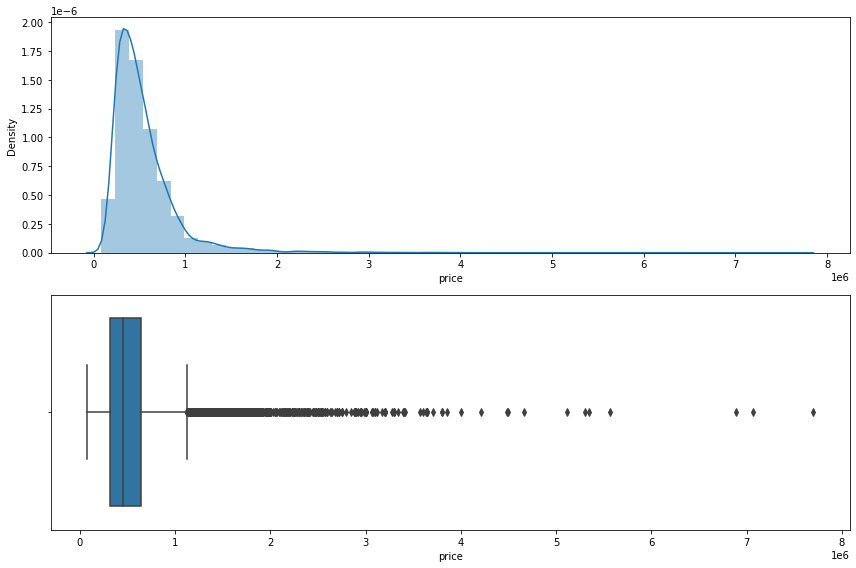

In [25]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(x=df['price'])
plt.tight_layout()

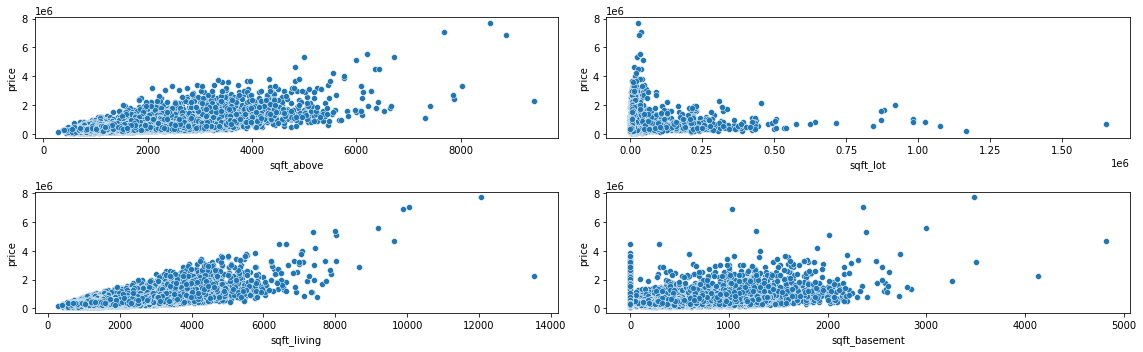

In [26]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(x=df['sqft_above'], y=df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(x=df['sqft_lot'],y=df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(x=df['sqft_living'],y=df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(x=df['sqft_basement'],y=df['price'])

plt.tight_layout()

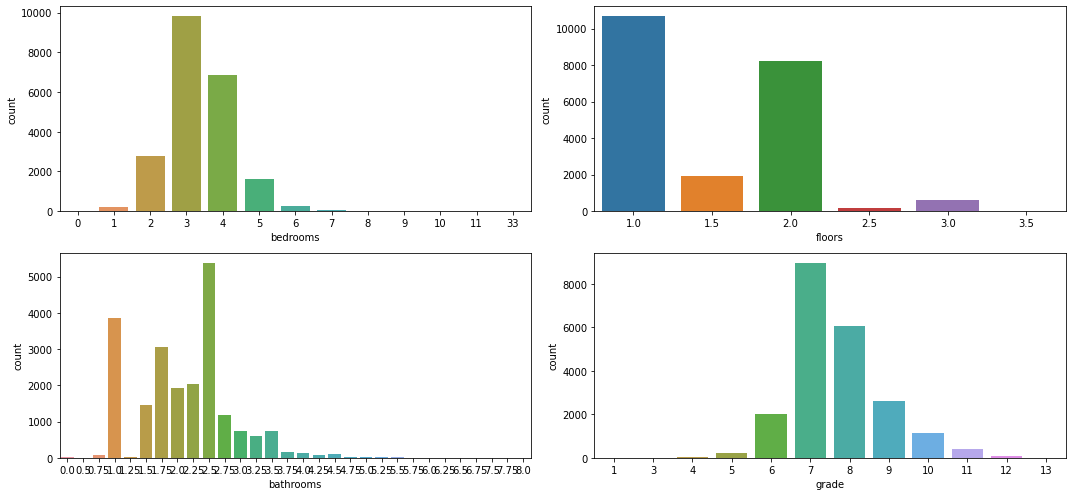

In [27]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(x=df['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(x=df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(x=df['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(x=df['grade'])
plt.tight_layout()

## 5. Compruebar la correlación entre variables y eliminar las que tengan una correlación superior a 0,8 

## Correlation

<AxesSubplot:>

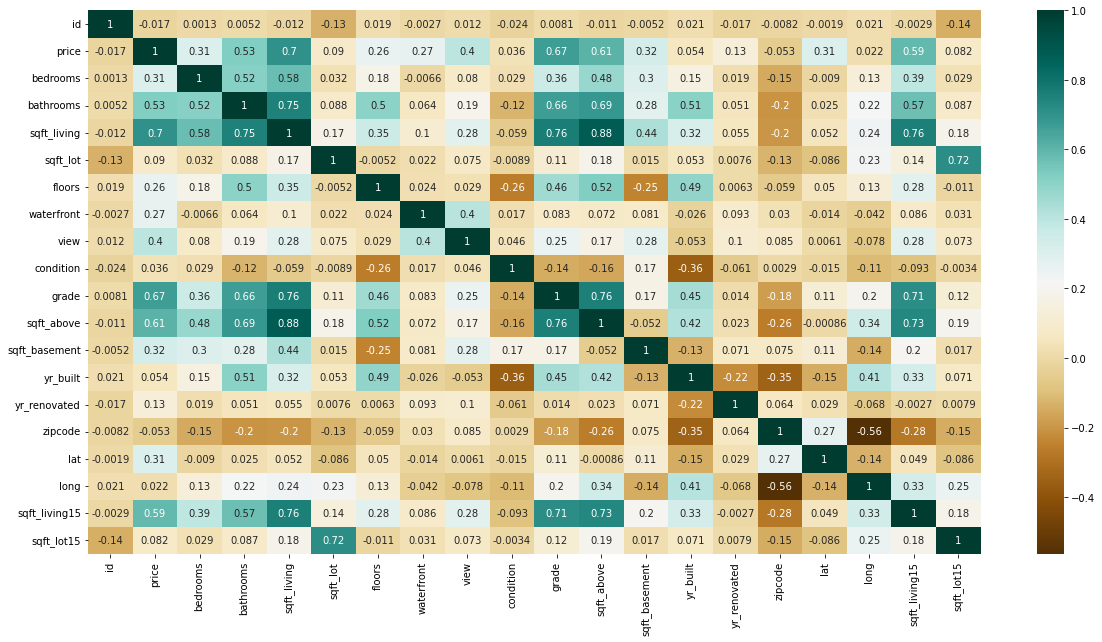

In [28]:
plt.figure(figsize=(20,10))
correlation_values= df.corr()
sns.heatmap(correlation_values,cmap='BrBG',annot=True)

In [29]:
df.shape

(21612, 21)

In [30]:
df = df.drop(['sqft_above'],axis=1)

In [31]:
df.shape

(21612, 20)

## 6. Buscar y eliminar valores atípicos

In [32]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580350e+09,5.401044e+05,3.370905,2.114774,2079.938599,1.510755e+04,1.494332,0.007542,0.234314,3.409402,7.656857,291.522534,1971.004488,84.406163,98077.934249,47.560061,-122.213891,1986.585647,12768.816676
std,2.876623e+09,3.671279e+05,0.930037,0.770177,918.444375,4.142138e+04,0.539991,0.086519,0.766334,0.650746,1.175484,442.580840,29.373936,401.688123,53.500031,0.138562,0.140830,685.389829,27304.759757
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219875e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.471075,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR = q3 - q1

qu = q3 + IQR*1.5
ql = q1 - IQR*1.5

df_out =df[~((df>qu) | (df<ql)).any(axis=1)]
df_out

/tmp/ipykernel_8289/813172754.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out =df[~((df>qu) | (df<ql)).any(axis=1)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819.0,2.0,0,0,3,7,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
21611,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='price'>

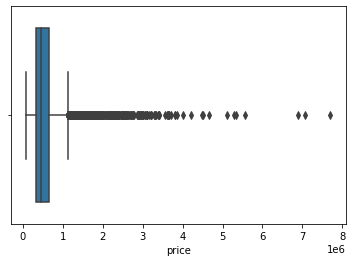

In [34]:
sns.boxplot(x=df['price'])

In [35]:
df=df[df['price']<6000000]
df.shape

(21609, 20)

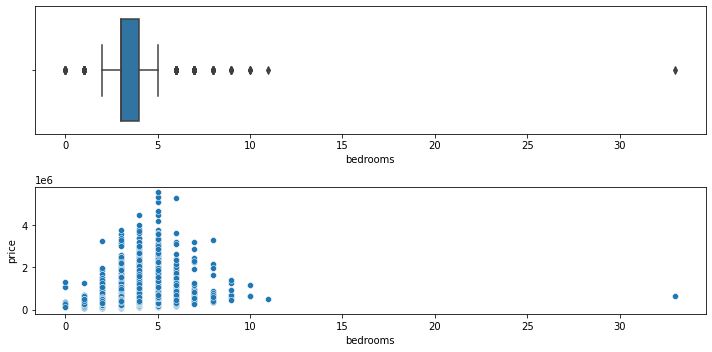

In [36]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(2,1,1)
sns.boxplot(x=df['bedrooms'])
fig.add_subplot(2,1,2)
sns.scatterplot(x=df['bedrooms'],y=df['price'])
plt.tight_layout()

In [37]:
df=df[df['bedrooms']<15]
df.shape

(21608, 20)

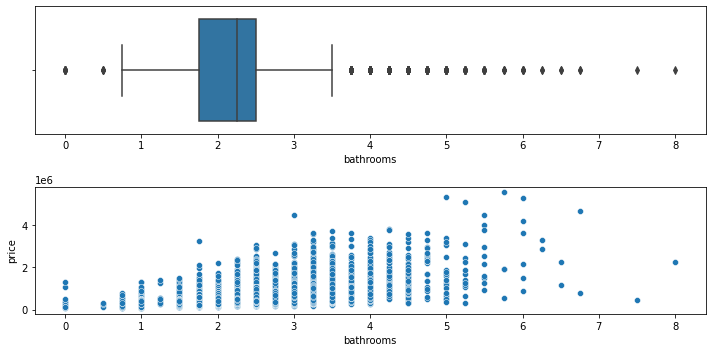

In [38]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(2,1,1)
sns.boxplot(x=df['bathrooms'])
fig.add_subplot(2,1,2)
sns.scatterplot(x=df['bathrooms'],y=df['price'])
plt.tight_layout()

In [39]:
df=df[df['bathrooms']<8]
df.shape

(21607, 20)

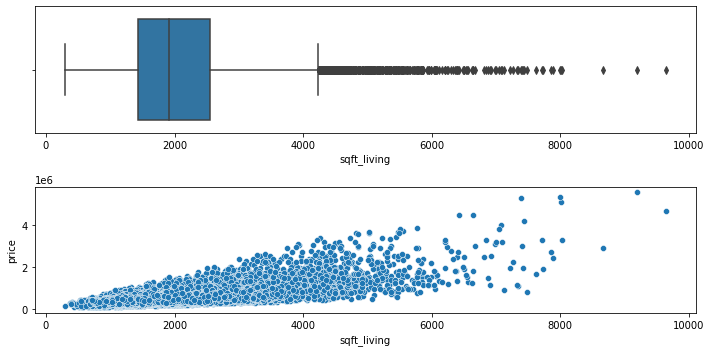

In [40]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(2,1,1)
sns.boxplot(x=df['sqft_living'])
fig.add_subplot(2,1,2)
sns.scatterplot(x=df['sqft_living'],y=df['price'])
plt.tight_layout()

In [41]:
df=df[df['sqft_living']<12000]
df.shape

(21607, 20)

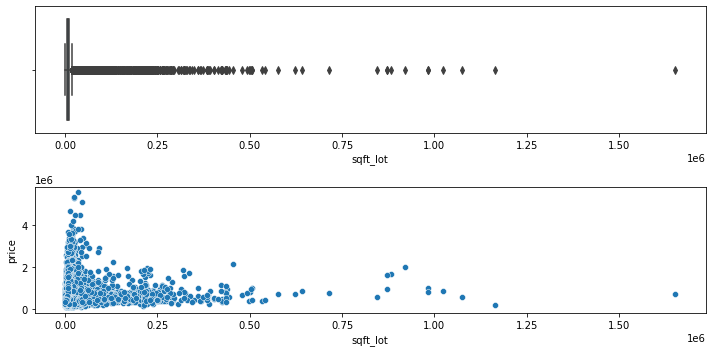

In [42]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(2,1,1)
sns.boxplot(x=df['sqft_lot'])
fig.add_subplot(2,1,2)
sns.scatterplot(x=df['sqft_lot'],y=df['price'])
plt.tight_layout()

In [43]:
df=df[df['sqft_lot']<1.25e+6]
df.shape

(21606, 20)

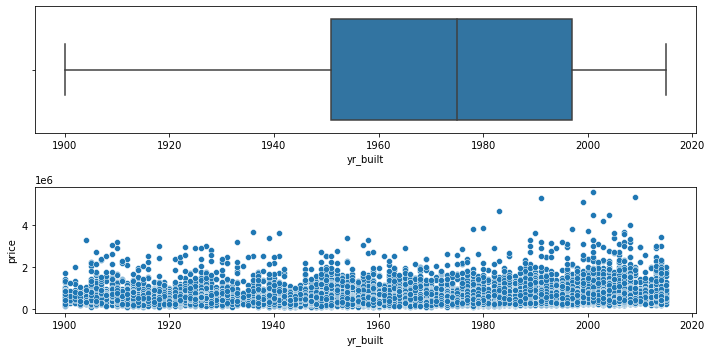

In [44]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(2,1,1)
sns.boxplot(x=df['yr_built'])
fig.add_subplot(2,1,2)
sns.scatterplot(x=df['yr_built'],y=df['price'])
plt.tight_layout()


In [45]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160600e+04,2.160600e+04,21606.000000,21606.000000,21606.000000,2.160600e+04,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000
mean,4.580214e+09,5.390849e+05,3.369018,2.113927,2078.274229,1.501634e+04,1.494215,0.007498,0.233639,3.409331,7.656114,291.067528,1971.009534,84.245025,98077.940942,47.560054,-122.213899,1986.158428,12738.804314
std,2.876361e+09,3.584304e+05,0.907293,0.767029,909.559150,3.985308e+04,0.539883,0.086267,0.765024,0.650703,1.173867,441.076412,29.370495,401.321870,53.502294,0.138555,0.140830,684.705490,27126.921499
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1427.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.471025,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10082.250000
max,9.900000e+09,5.570000e+06,11.000000,7.500000,9640.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 7. Comprobar la normalidad de la distribución de continua variable

/home/user/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

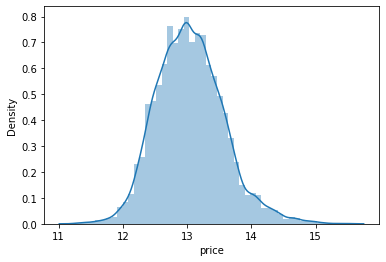

In [46]:
sns.distplot(np.log(df.price))

## 8. Búscar de linealidad y relación general entre variables

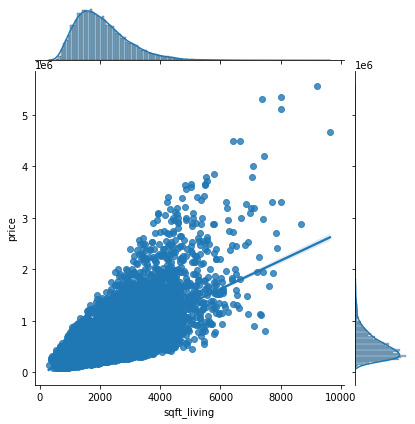

In [47]:
sns.jointplot(x='sqft_living', y='price',data=df, kind='reg')

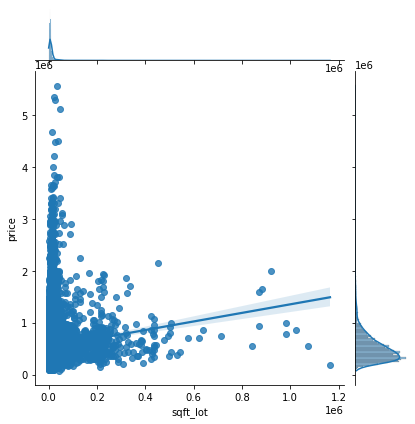

In [48]:
sns.jointplot(x='sqft_lot', y='price',data=df, kind='reg')

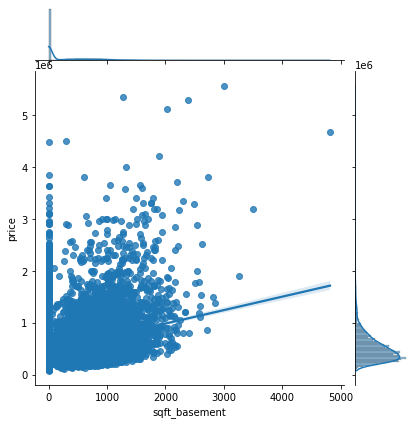

In [49]:
sns.jointplot(x='sqft_basement', y='price',data=df, kind='reg')

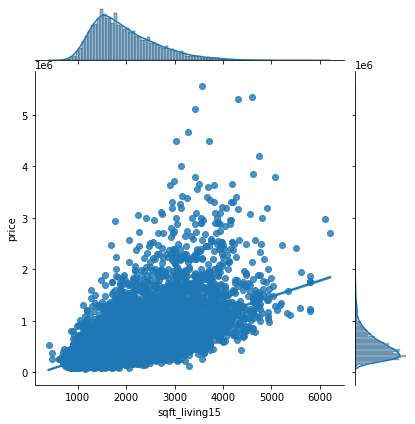

In [50]:
sns.jointplot(x='sqft_living15', y='price',data=df, kind='reg')

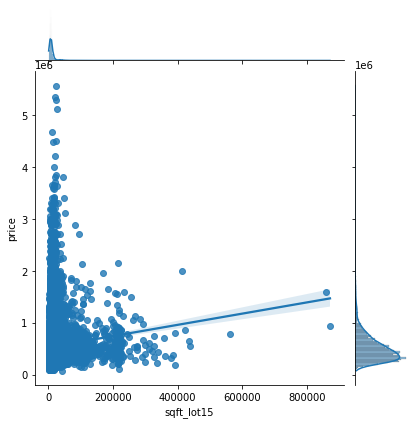

In [51]:
sns.jointplot(x='sqft_lot15', y='price',data=df, kind='reg')

In [52]:
#sns.pairplot(df)

## 9. Identificar de variables categóricas

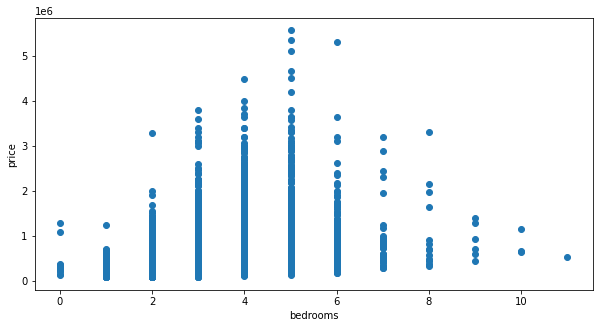

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['bedrooms'], df['price'])
ax.set_xlabel('bedrooms')
ax.set_ylabel('price')
plt.show()

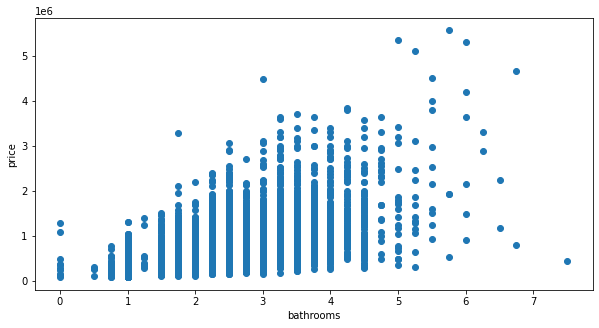

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['bathrooms'], df['price'])
ax.set_xlabel('bathrooms')
ax.set_ylabel('price')
plt.show()

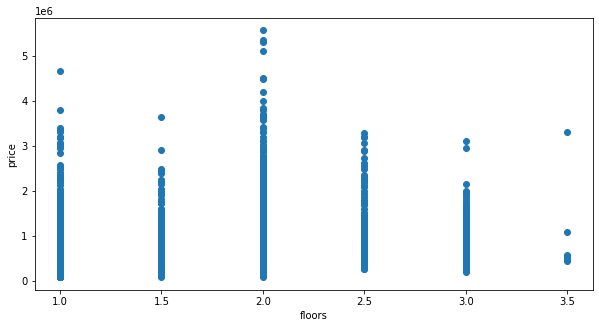

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['floors'], df['price'])
ax.set_xlabel('floors')
ax.set_ylabel('price')
plt.show()

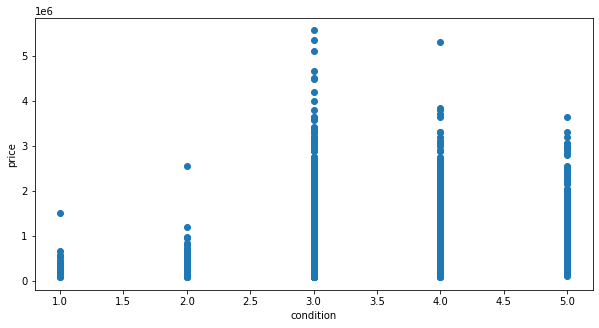

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['condition'], df['price'])
ax.set_xlabel('condition')
ax.set_ylabel('price')
plt.show()

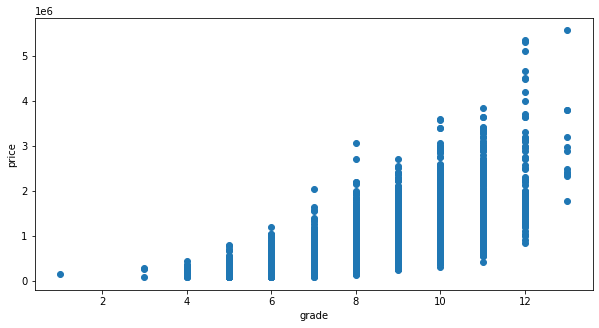

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['grade'], df['price'])
ax.set_xlabel('grade')
ax.set_ylabel('price')
plt.show()

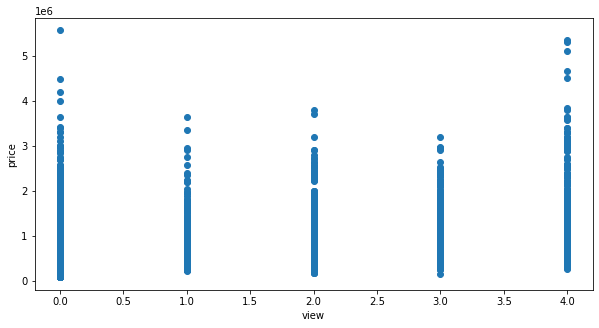

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['view'], df['price'])
ax.set_xlabel('view')
ax.set_ylabel('price')
plt.show()

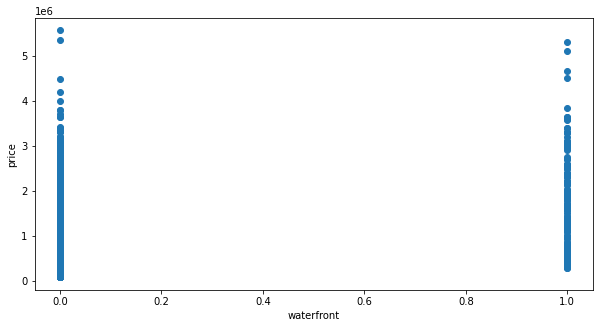

In [59]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['waterfront'], df['price'])
ax.set_xlabel('waterfront')
ax.set_ylabel('price')
plt.show()

In [60]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


## 10. Extraer otras informaciónes válida, por ejemplo usando time series

In [61]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,263000018,2014-05-21,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21611,6600060120,2015-02-23,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21612,1523300141,2014-06-23,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21613,291310100,2015-01-16,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


In [62]:
df_out['date'] = pd.to_datetime(df_out['date'])
df_out['year'] = pd.DatetimeIndex(df_out['date']).year
df_out['month'] = pd.DatetimeIndex(df_out['date']).month
df_out['day'] = pd.DatetimeIndex(df_out['date']).day
df_out

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819.0,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,263000018,2014-05-21,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21611,6600060120,2015-02-23,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21612,1523300141,2014-06-23,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21613,291310100,2015-01-16,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


In [63]:
df.groupby(['year']).mean()['price']

year
2014    537710.114309
2015    541966.351340
Name: price, dtype: float64

In [64]:
df.groupby(['month']).mean()['price']

month
1     525870.889571
2     507851.371200
3     543893.930630
4     561837.774989
5     550052.154579
6     554978.096878
7     544949.980995
8     536445.276804
9     525669.080654
10    535211.855621
11    521961.009213
12    524461.866757
Name: price, dtype: float64

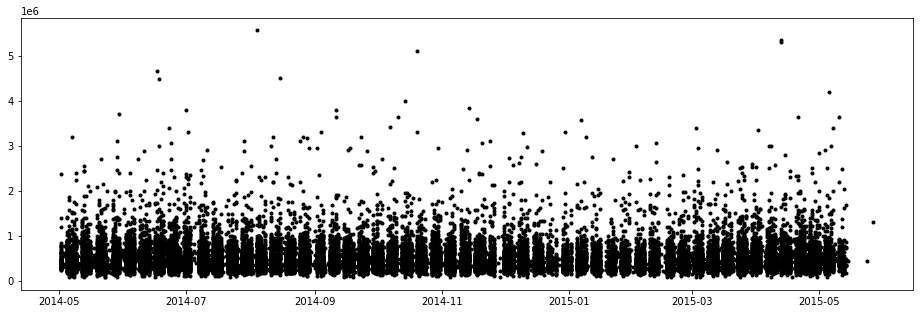

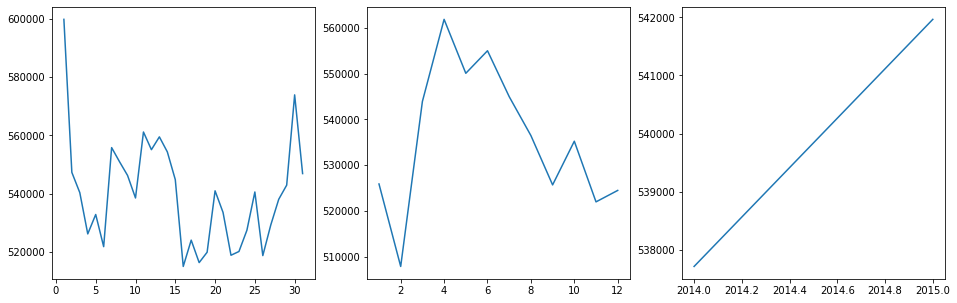

In [65]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(df['date'], df['price'],'.k')

fig, ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(df.groupby(['day']).mean()['price'])
ax[1].plot(df.groupby(['month']).mean()['price'])
ax[2].plot(df.groupby(['year']).mean()['price'])

In [66]:
df = df.drop(['date','id', 'zipcode','day'], axis=1)

In [67]:
df_out = df_out.drop(['date','id', 'zipcode','day'], axis=1)

In [68]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,7,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000.0,1.0,0,0,3,6,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,7,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,8,0,1987,0,47.6168,-122.045,1800,7503,2015,2


## Neural Network

In [69]:
def data_processing(df):
    
    ## Divide my data into X data and y data
    X_data = df.drop('price',axis=1)
    y_data = df['price'].values
    
    ## Split my data into test and train samples
    from sklearn.model_selection import train_test_split
    
    (X_train, X_test, y_train, y_test) = train_test_split(X_data, y_data, test_size=0.2, random_state=11)
    print("train data shape: ", X_train.shape)
    print("test data shape:  ", X_test.shape)
    
    ### Scale the data with the sklearn.preprocessing.StandardScaler
    from sklearn.preprocessing import StandardScaler

    s_scaler = StandardScaler()
    X_train = s_scaler.fit_transform(X_train.astype(float))
    X_test = s_scaler.transform(X_test.astype(float))
    
    return X_train, X_test, y_train, y_test

In [70]:
X_train, X_test, y_train, y_test = data_processing(df)

train data shape:  (17284, 18)
test data shape:   (4322, 18)


In [71]:
# input_shape 
print("Shape of a single sample: ", X_train[0].shape)

Shape of a single sample:  (18,)


In [72]:
# Import a sequential model
from tensorflow.keras.models import Sequential
# Import the models to solve the problems
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout
# Import regularizers
from tensorflow.keras import regularizers
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import ModelCheckpoint

In [73]:
# Create a function with the Sequential model
def get_model(units=19, activation_hidden_layer = 'relu', drate=0.3, wd=0.01):
    model = Sequential([
                        InputLayer(input_shape = X_train[0].shape),
        
                        Dense(units=units, activation = activation_hidden_layer, name='layer_1'),
                        Dropout(drate),
        
                        Dense(units=units, activation = activation_hidden_layer, name='layer_2'),
    
                        Dense(units=units, activation = activation_hidden_layer, name='layer_3'),
        
                        Dropout(drate),
                        Dense(units=units, activation = activation_hidden_layer, name='layer_4'),
                        
                        Dense(units=1, name='output_layer') # The units in the output layer must be the number of posibilities they_data can take into account
                        ])
    return model

In [74]:
# Intance a Sequential model
units = 500
model = get_model(units)

2022-04-01 17:43:12.819846: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/Products/root/lib
2022-04-01 17:43:12.819871: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-01 17:43:12.819890: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-Lenovo-ideapad-330S-14IKB): /proc/driver/nvidia/version does not exist
2022-04-01 17:43:12.820681: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [75]:
def compile_model(model, optimizer, loss, metrics):   
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    # Summary
    model.summary()

In [76]:
compile_model(model, 'adam', 'mape', ['mape'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 500)               9500      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 layer_2 (Dense)             (None, 500)               250500    
                                                                 
 layer_3 (Dense)             (None, 500)               250500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 layer_4 (Dense)             (None, 500)               250500    
                                                                 
 output_layer (Dense)        (None, 1)                 5

In [77]:
checkpoint=ModelCheckpoint('HousePrices.h5',
                           save_weights_only=False,
                           frequency='epoch',
                           verbose=1,
                           monitor='mape')

In [78]:
epochs = 200
myhistory = model.fit(X_train, y_train, epochs=epochs, batch_size = 128, validation_split=0.15, verbose=2, callbacks=[EarlyStopping(monitor='val_loss',patience=10), checkpoint])

Epoch 1/200

Epoch 1: saving model to HousePrices.h5
115/115 - 2s - loss: 67.0545 - mape: 67.0545 - val_loss: 26.1753 - val_mape: 26.1753 - 2s/epoch - 17ms/step
Epoch 2/200

Epoch 2: saving model to HousePrices.h5
115/115 - 1s - loss: 22.7551 - mape: 22.7551 - val_loss: 20.9834 - val_mape: 20.9834 - 1s/epoch - 10ms/step
Epoch 3/200

Epoch 3: saving model to HousePrices.h5
115/115 - 1s - loss: 20.6448 - mape: 20.6448 - val_loss: 20.2793 - val_mape: 20.2793 - 1s/epoch - 10ms/step
Epoch 4/200

Epoch 4: saving model to HousePrices.h5
115/115 - 1s - loss: 19.9248 - mape: 19.9248 - val_loss: 19.4108 - val_mape: 19.4108 - 1s/epoch - 11ms/step
Epoch 5/200

Epoch 5: saving model to HousePrices.h5
115/115 - 1s - loss: 19.7048 - mape: 19.7048 - val_loss: 19.1465 - val_mape: 19.1465 - 1s/epoch - 11ms/step
Epoch 6/200

Epoch 6: saving model to HousePrices.h5
115/115 - 1s - loss: 19.5078 - mape: 19.5078 - val_loss: 18.7848 - val_mape: 18.7848 - 1s/epoch - 10ms/step
Epoch 7/200

Epoch 7: saving model

Epoch 52/200

Epoch 52: saving model to HousePrices.h5
115/115 - 2s - loss: 14.3808 - mape: 14.3808 - val_loss: 13.7892 - val_mape: 13.7892 - 2s/epoch - 13ms/step
Epoch 53/200

Epoch 53: saving model to HousePrices.h5
115/115 - 1s - loss: 14.4678 - mape: 14.4678 - val_loss: 13.4866 - val_mape: 13.4866 - 1s/epoch - 12ms/step
Epoch 54/200

Epoch 54: saving model to HousePrices.h5
115/115 - 1s - loss: 14.4030 - mape: 14.4030 - val_loss: 13.6461 - val_mape: 13.6461 - 1s/epoch - 10ms/step
Epoch 55/200

Epoch 55: saving model to HousePrices.h5
115/115 - 1s - loss: 14.3404 - mape: 14.3404 - val_loss: 13.5916 - val_mape: 13.5916 - 1s/epoch - 10ms/step
Epoch 56/200

Epoch 56: saving model to HousePrices.h5
115/115 - 1s - loss: 14.4012 - mape: 14.4012 - val_loss: 13.4303 - val_mape: 13.4303 - 1s/epoch - 11ms/step
Epoch 57/200

Epoch 57: saving model to HousePrices.h5
115/115 - 1s - loss: 14.3489 - mape: 14.3489 - val_loss: 13.6158 - val_mape: 13.6158 - 1s/epoch - 12ms/step
Epoch 58/200

Epoch 58

In [79]:
myhistory.history.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])

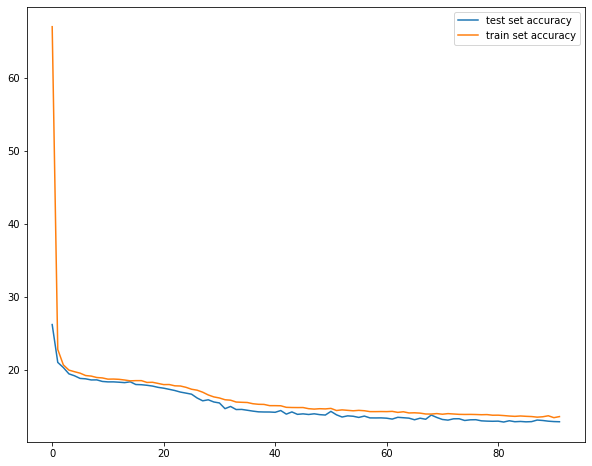

In [80]:
xvals = range(len(myhistory.history['loss']))

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(xvals, myhistory.history['val_mape'], '-', label='test set accuracy')
ax.plot(xvals, myhistory.history['mape'], '-', label='train set accuracy')
ax.legend()
plt.show()


In [81]:
y_pred = model.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 71482.87509761106
MSE: 16363774838.440363
RMSE: 127920.97106589038
MAPE: 0.35379375414677183
VarScore: 0.872527488686444


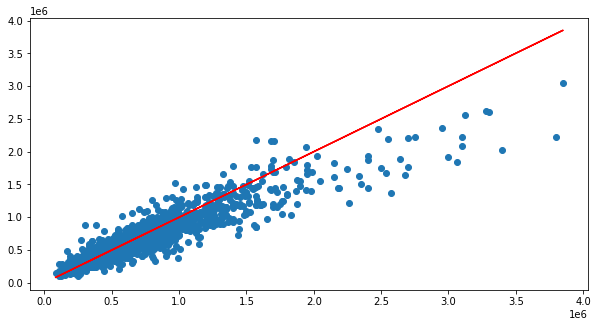

In [82]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [83]:
print("Real Value: ", y_test[0])
print("Predicted Value: ", y_pred[0][0])   

Real Value:  308000.0
Predicted Value:  347888.6


## Neural Network with the data in the Interquartile Range Outliers

In [84]:
# Create a function with the Sequential model
def get_model(units=19, activation_hidden_layer = 'relu', drate=0.3, wd=0.01):
    model = Sequential([
                        InputLayer(input_shape = X_train[0].shape),
        
                        Dense(units=units, activation = activation_hidden_layer, kernel_regularizer = regularizers.l2(wd), name='layer_1'),
                        Dropout(drate),
        
                        Dense(units=units, activation = activation_hidden_layer, kernel_regularizer = regularizers.l2(wd), name='layer_2'),
                        Dropout(drate),
        
                        Dense(units=units, activation = activation_hidden_layer, kernel_regularizer = regularizers.l2(wd), name='layer_3'),
                        Dropout(drate),
        
                        Dense(units=units, activation = activation_hidden_layer, kernel_regularizer = regularizers.l2(wd), name='layer_4'),
                        
                        Dense(units=1, name='output_layer') # The units in the output layer must be the number of posibilities they_data can take into account
                        ])
    return model

In [85]:
# Intance a Sequential model
units = 500
model = get_model(units)

In [86]:
compile_model(model, 'adam', 'mape', ['mape'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 500)               9500      
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 layer_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 layer_3 (Dense)             (None, 500)               250500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 layer_4 (Dense)             (None, 500)              

In [87]:
X_train_out, X_test_out, y_train_out, y_test_out = data_processing(df_out)

train data shape:  (11966, 18)
test data shape:   (2992, 18)


In [88]:
checkpoint=ModelCheckpoint('HousePrices2.h5',
                           save_weights_only=False,
                           frequency='epoch',
                           verbose=1,
                           monitor='mape')

In [89]:
epochs = 200
myhistory2 = model.fit(X_train_out, y_train_out, epochs=epochs, batch_size = 128, validation_split=0.15, verbose=2, callbacks=[EarlyStopping(monitor='val_loss', patience=10), checkpoint])

Epoch 1/200

Epoch 1: saving model to HousePrices2.h5
80/80 - 2s - loss: 104.2176 - mape: 99.9996 - val_loss: 100.1971 - val_mape: 99.9991 - 2s/epoch - 20ms/step
Epoch 2/200

Epoch 2: saving model to HousePrices2.h5
80/80 - 1s - loss: 100.0331 - mape: 99.9977 - val_loss: 99.9964 - val_mape: 99.9958 - 986ms/epoch - 12ms/step
Epoch 3/200

Epoch 3: saving model to HousePrices2.h5
80/80 - 1s - loss: 99.9929 - mape: 99.9925 - val_loss: 99.9887 - val_mape: 99.9877 - 908ms/epoch - 11ms/step
Epoch 4/200

Epoch 4: saving model to HousePrices2.h5
80/80 - 1s - loss: 99.9817 - mape: 99.9782 - val_loss: 99.9715 - val_mape: 99.9626 - 859ms/epoch - 11ms/step
Epoch 5/200

Epoch 5: saving model to HousePrices2.h5
80/80 - 1s - loss: 95.7806 - mape: 94.6345 - val_loss: 59.4079 - val_mape: 51.7671 - 1s/epoch - 13ms/step
Epoch 6/200

Epoch 6: saving model to HousePrices2.h5
80/80 - 1s - loss: 33.2039 - mape: 24.6449 - val_loss: 26.6182 - val_mape: 18.4837 - 899ms/epoch - 11ms/step
Epoch 7/200

Epoch 7: sav

Epoch 51/200

Epoch 51: saving model to HousePrices2.h5
80/80 - 1s - loss: 21.3167 - mape: 17.5991 - val_loss: 19.9783 - val_mape: 16.2839 - 908ms/epoch - 11ms/step
Epoch 52/200

Epoch 52: saving model to HousePrices2.h5
80/80 - 1s - loss: 21.1804 - mape: 17.4930 - val_loss: 20.0087 - val_mape: 16.3404 - 893ms/epoch - 11ms/step
Epoch 53/200

Epoch 53: saving model to HousePrices2.h5
80/80 - 1s - loss: 21.0395 - mape: 17.3685 - val_loss: 19.9717 - val_mape: 16.3010 - 899ms/epoch - 11ms/step
Epoch 54/200

Epoch 54: saving model to HousePrices2.h5
80/80 - 1s - loss: 21.1014 - mape: 17.4488 - val_loss: 19.9870 - val_mape: 16.3459 - 954ms/epoch - 12ms/step
Epoch 55/200

Epoch 55: saving model to HousePrices2.h5
80/80 - 1s - loss: 21.1485 - mape: 17.4964 - val_loss: 19.9041 - val_mape: 16.2701 - 998ms/epoch - 12ms/step
Epoch 56/200

Epoch 56: saving model to HousePrices2.h5
80/80 - 1s - loss: 21.0215 - mape: 17.3984 - val_loss: 19.9941 - val_mape: 16.4189 - 942ms/epoch - 12ms/step
Epoch 57/2

Epoch 101/200

Epoch 101: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.6622 - mape: 17.5892 - val_loss: 19.3272 - val_mape: 16.2295 - 986ms/epoch - 12ms/step
Epoch 102/200

Epoch 102: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.5026 - mape: 17.4378 - val_loss: 19.2975 - val_mape: 16.2304 - 938ms/epoch - 12ms/step
Epoch 103/200

Epoch 103: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.3067 - mape: 17.2439 - val_loss: 19.2888 - val_mape: 16.2343 - 988ms/epoch - 12ms/step
Epoch 104/200

Epoch 104: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.6336 - mape: 17.5755 - val_loss: 19.4201 - val_mape: 16.4050 - 1s/epoch - 14ms/step
Epoch 105/200

Epoch 105: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.4465 - mape: 17.4150 - val_loss: 19.2807 - val_mape: 16.2281 - 1s/epoch - 14ms/step
Epoch 106/200

Epoch 106: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.4337 - mape: 17.3856 - val_loss: 19.2477 - val_mape: 16.2042 - 968ms/epoch - 12ms/step
Epoc

Epoch 151/200

Epoch 151: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.0792 - mape: 17.2971 - val_loss: 18.9711 - val_mape: 16.1548 - 1s/epoch - 14ms/step
Epoch 152/200

Epoch 152: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.1249 - mape: 17.3433 - val_loss: 19.1319 - val_mape: 16.3967 - 1s/epoch - 14ms/step
Epoch 153/200

Epoch 153: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.1261 - mape: 17.3653 - val_loss: 18.9429 - val_mape: 16.1549 - 961ms/epoch - 12ms/step
Epoch 154/200

Epoch 154: saving model to HousePrices2.h5
80/80 - 1s - loss: 19.9333 - mape: 17.1686 - val_loss: 18.9254 - val_mape: 16.1458 - 1s/epoch - 13ms/step
Epoch 155/200

Epoch 155: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.0519 - mape: 17.2957 - val_loss: 19.1117 - val_mape: 16.2932 - 1s/epoch - 14ms/step
Epoch 156/200

Epoch 156: saving model to HousePrices2.h5
80/80 - 1s - loss: 20.1448 - mape: 17.3792 - val_loss: 18.9579 - val_mape: 16.2128 - 1s/epoch - 13ms/step
Epoch 157/200

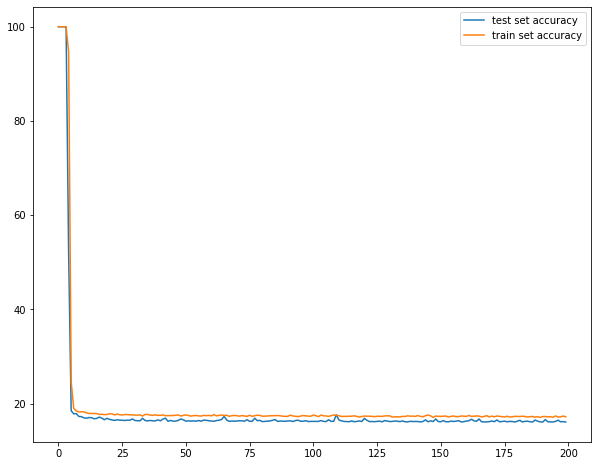

In [90]:
xvals = range(len(myhistory2.history['loss']))

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(xvals, myhistory2.history['val_mape'], '-', label='test set accuracy')
ax.plot(xvals, myhistory2.history['mape'], '-', label='train set accuracy')
ax.legend()
plt.show()

In [91]:
y_pred_out = model.predict(X_test_out)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test_out, y_pred_out))  
print('MSE:', metrics.mean_squared_error(y_test_out, y_pred_out))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_out, y_pred_out)))
print('MAPE:', np.sqrt(metrics.mean_absolute_percentage_error(y_test_out, y_pred_out)))
print('VarScore:',metrics.explained_variance_score(y_test_out,y_pred_out))

MAE: 73634.52058614639
MSE: 11336883198.076288
RMSE: 106474.80076560973
MAPE: 0.4002854437796262
VarScore: 0.6709724592782034


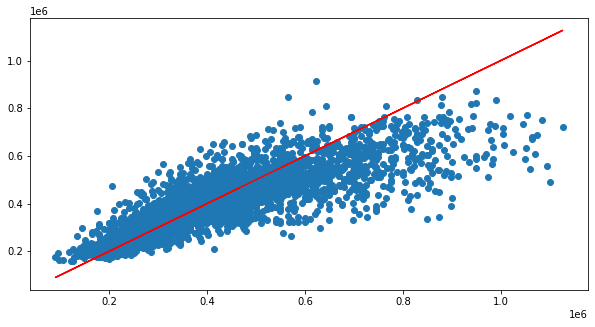

In [92]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test_out,y_pred_out)
# Perfect predictions
plt.plot(y_test_out,y_test_out,'r')

In [93]:
!ls

homework_07.ipynb  HousePrices2.h5  HousePrices.h5  kc_house_data.csv


In [94]:
print("Real Value: ", y_test_out[0])
print("Predicted Value: ", y_pred_out[0][0])   

Real Value:  465000.0
Predicted Value:  501051.12
